#                                             Final Project

In [572]:
#imporn nessasary packages
import pandas as pd
import numpy as np
import re
#from autocorrect import spell
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt
import csv
from textblob import TextBlob
import pandas
import sklearn
from nltk.stem import LancasterStemmer
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from itertools import combinations 

FedCentral is platform that was created for non-profit Jewish organizations. It allows users to search for materials such as documents, photos and videos. Those materials are usually used for web pages, printouts, training sessions or for various fundraising or educational campaigns.

<img src="fed1.png"/>

Each document has title, short decription, long description and tags.

<img src="fed2.png"/>

The first goal of the project is to improve search algorithm. The current search algorithm sometimes returns irrelevant results.

The requirmernts of the search algorithm are:

1. Algorithm should find materials that contain exact or partial keyword match.
2. Materials with exact keyword match should appear in main results while materials with partial keryword match should appear in related results section.
3. Search results should be sorted based on frequency of occurrence of keywords in material content.
4. Results that have keyword match in title should appear above materials that have keyword match in description or tags.

First, I created the function that loads the dataset.

In [562]:
def load_dataset(dataset):
    df = pd.read_csv(dataset)
    return df

#import materials dataset
materials = load_dataset('assets.csv').head(3)

After that I performed the following modifications with materials data:
1. Replaced NAs with blanks, so that NAs don't block NLP functions.  
2. Removed meangless characters such as HTML tags.
3. Fixed special characters issue (some of the special characters didn't appear correctly in csv file).
4. Removed punctuation.
5. Implemented tokenization(breaking a stream of text up into words).
6. Removed stop words.
7. Converted words to their base forms - lemmas.

In [563]:
#function that replaces NAs with blanks
def replace_na(df,columns):
    df[columns] = df[columns].fillna('')

columns_list = ['Display Name','Short Description','Description','Public Tag Names']
replace_na(materials,columns_list)
materials.head(3)

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,GA2015_1800x650_fedweb.jpg,jpg,Davi Ellis,davi@luminantdigital.com,,GA2015_1800x650_fedweb.jpg,web,...,N,N,NaN,N,N,N,N,N,N,
1,369549,9/4/15 14:38,9/4/15 14:38,Campers Play Behind Israeli Flags,jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,<p>A group of young boy campers play near a vo...,Kids play behind Israeli flags.,full,...,N,Y,NaN,N,N,N,N,N,N,young | children | outdoors | israel | magen d...
2,369550,9/4/15 14:38,9/4/15 14:38,Group of Adults Sitting Outdoors,JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,<p>A group of men and women adults sit togethe...,Group of adults.,full,...,N,Y,NaN,N,N,N,N,N,N,community | outdoors | outside | adults | man ...


In [564]:
#function that removes html tags
def remove_html(df,columns):
    patterns = ['<p>','</p>','<em>','</em>','<a>','</a>','|']
    for column in columns:
        for pattern in patterns:
            df[column] = df[column].str.replace(pattern,'')

remove_html(materials,columns_list)
materials.head(3)

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,GA2015_1800x650_fedweb.jpg,jpg,Davi Ellis,davi@luminantdigital.com,,GA2015_1800x650_fedweb.jpg,web,...,N,N,NaN,N,N,N,N,N,N,
1,369549,9/4/15 14:38,9/4/15 14:38,Campers Play Behind Israeli Flags,jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of young boy campers play near a volle...,Kids play behind Israeli flags.,full,...,N,Y,NaN,N,N,N,N,N,N,young children outdoors israel magen david...
2,369550,9/4/15 14:38,9/4/15 14:38,Group of Adults Sitting Outdoors,JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of men and women adults sit together o...,Group of adults.,full,...,N,Y,NaN,N,N,N,N,N,N,community outdoors outside adults man wom...


In [565]:
#function that adjusts some of the special characters
def adjust_sp_ch(df,columns):
    patterns = ['&quot;']
    for column in columns:
        for pattern in patterns:
            df[column] = df[column].str.replace(pattern,'"') 

adjust_sp_ch(materials,columns)

In [566]:
#functionm that replaces NaNs with blanks
def replace_na(df, columns):
    df[columns] = df[columns].fillna('')
    
replace_na(materials,columns)
materials.head(3)

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,GA2015_1800x650_fedweb.jpg,jpg,Davi Ellis,davi@luminantdigital.com,,GA2015_1800x650_fedweb.jpg,web,...,N,N,NaN,N,N,N,N,N,N,
1,369549,9/4/15 14:38,9/4/15 14:38,Campers Play Behind Israeli Flags,jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of young boy campers play near a volle...,Kids play behind Israeli flags.,full,...,N,Y,NaN,N,N,N,N,N,N,young children outdoors israel magen david...
2,369550,9/4/15 14:38,9/4/15 14:38,Group of Adults Sitting Outdoors,JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of men and women adults sit together o...,Group of adults.,full,...,N,Y,NaN,N,N,N,N,N,N,community outdoors outside adults man wom...


In [567]:
#function that removes punctuation
def remove_commas(df, columns):
    for column in columns:
        df[column] = df[column].str.replace(r'[^\w\s]','')

        
remove_commas(materials,columns)
materials.head(3)        

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,GA2015_1800x650_fedwebjpg,jpg,Davi Ellis,davi@luminantdigital.com,,GA2015_1800x650_fedwebjpg,web,...,N,N,NaN,N,N,N,N,N,N,
1,369549,9/4/15 14:38,9/4/15 14:38,Campers Play Behind Israeli Flags,jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of young boy campers play near a volle...,Kids play behind Israeli flags,full,...,N,Y,NaN,N,N,N,N,N,N,young children outdoors israel magen david...
2,369550,9/4/15 14:38,9/4/15 14:38,Group of Adults Sitting Outdoors,JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,A group of men and women adults sit together o...,Group of adults,full,...,N,Y,NaN,N,N,N,N,N,N,community outdoors outside adults man wom...


In [568]:
# function that implements tokenization and removes stop words
stop_words = set(stopwords.words('english'))

def apply_tokenization(df, columns):
    for column in columns_list:
        df[column] = df[column].apply(word_tokenize)
        #remove stop words    
        for i in range(0,len(df)):
            df[column][i] =[w for w in df[column][i] if w not in stop_words]    

apply_tokenization(materials, columns)
materials.head(3) 

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,[GA2015_1800x650_fedwebjpg],jpg,Davi Ellis,davi@luminantdigital.com,[],[GA2015_1800x650_fedwebjpg],web,...,N,N,NaN,N,N,N,N,N,N,[]
1,369549,9/4/15 14:38,9/4/15 14:38,"[Campers, Play, Behind, Israeli, Flags]",jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,"[A, group, young, boy, campers, play, near, vo...","[Kids, play, behind, Israeli, flags]",full,...,N,Y,NaN,N,N,N,N,N,N,"[young, children, outdoors, israel, magen, dav..."
2,369550,9/4/15 14:38,9/4/15 14:38,"[Group, Adults, Sitting, Outdoors]",JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,"[A, group, men, women, adults, sit, together, ...","[Group, adults]",full,...,N,Y,NaN,N,N,N,N,N,N,"[community, outdoors, outside, adults, man, wo..."


In [569]:
#function that takes words to their base forms - lemmas
def convert_lemma(df, columns):
    lancaster = LancasterStemmer()

    for column in columns:
        for i in range(0,len(df)):
            df[column][i] =[lancaster.stem(w) for w in df[column][i]]    

convert_lemma(materials, columns)
materials.head(3) 

,ID,Date Uploaded,Date Approved,Display Name,Type of File,Author (name),Author (email),Description,Short Description,File Use,...,Optimized for Web Use,Downloadable,Packages,Marketing Materials,Design File,Graphics,Best Practices,Research & reports,Training Materials,Public Tag Names
0,368719,8/26/15 19:08,9/4/15 13:13,[ga2015_1800x650_fedwebjpg],jpg,Davi Ellis,davi@luminantdigital.com,[],[ga2015_1800x650_fedwebjpg],web,...,N,N,NaN,N,N,N,N,N,N,[]
1,369549,9/4/15 14:38,9/4/15 14:38,"[camp, play, behind, israel, flag]",jpg,Hindy Gershman,hindy.gershman@jewishfederations.org,"[a, group, young, boy, camp, play, near, volle...","[kid, play, behind, israel, flag]",full,...,N,Y,NaN,N,N,N,N,N,N,"[young, childr, outdo, israel, mag, david, sta..."
2,369550,9/4/15 14:38,9/4/15 14:38,"[group, adult, sit, outdo]",JPG,Hindy Gershman,hindy.gershman@jewishfederations.org,"[a, group, men, wom, adult, sit, togeth, outdo]","[group, adult]",full,...,N,Y,NaN,N,N,N,N,N,N,"[commun, outdo, outsid, adult, man, wom, horiz..."


In [570]:
#implement autocorrect of a search keyword
search_key = 'family'
#spell(search_key)

After that I counted the number of times keyword that search keyword appears in material content.

In [559]:
def words_freq(df, columns,keyword):
    for column in columns:
        for i in range(0,len(df)):
        df[column][i] = df[column][i].count(keyword)   

ords_freq(materials,columns,search_key)
materials[columns].head(3) 

,Display Name,Short Description,Description,Public Tag Names
0,0,0,0,0
1,0,0,0,0
2,0,0,0,0


According to the requirments, materials that have keyword match in title (Display Name) should appear above the results that have keyword match in other content.  That is why weight 100 was assigned to material while weights of 1, 05 and 0.2 were assigned to description, tags amd short description respectevly.

In [331]:
df['score'] = 100*df['Display Name'] + 1*df['Description'] + 0.5*df['Public Tag Names'] + 0.2*df['Short Description']
columns_list.append('score')
df[columns_list].head() 

,Display Name,Short Description,Description,Public Tag Names,score
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0


Materials are sorted based on score in descending order.

In [332]:
df.sort_values('score', ascending = False, inplace = True)
df[['Display Name ','Short Description ','Description ','Public Tag Names ','score']].head(10) 

,Display Name,Short Description,Description,Public Tag Names,score
2220,Lion Lunch & Learn “Lions Give Back” - Pittsburgh,Lion Lunch and Learn “Lions Give Back” - Pitts...,Lion Lunch and Learn “Lions Give Back” - Pitts...,nwp shared practices outreach social action,202.4
4464,Memphis - Lion of Judah Kick-Off Event,Annual campaign kick-off event for Lions and p...,The purpose is to bring the Lions together and...,shared practices best practices NWP Resource...,103.4
3327,Lion of Judah Giving Levels,list of Lion of Judah giving levels,List of Lion of Judah giving levels and Lion o...,campaign lion of judah women's philanthropy ...,103.2
4465,Memphis Lion of Judah Recognition Event,Memphis program honoring all Lions,A write-up about a program in&nbsp;Memphis&nbs...,shared practices best practices donor recogn...,103.2
3323,A Lion of Judah Odyssey,One Lion of Judah's story of becoming a Lion a...,This is a story of a a donor's journey from fi...,lion of judah Women Philantropy lion pin L...,102.9
2126,Jewish Federation FedEx rates G4SI for Lion Pins,Jewish Federation FedEx rates G4SI for Lion Pins,Jewish Federation FedEx rates G4SI for Lion Pi...,nwp lion of judah pin shipping prices lio...,102.7
9268,Lion of Judah Endowment Fund Agreement Template,The Lion of Judah Endowment Fund Agreement Tem...,The Lion of Judah Endowment Fund Agreement Tem...,template lion of judah LOJE Lion of Judah E...,102.7
3755,Lion Pin - NEW pin order form,Order you Lion pin - fill out the form,Order you Lion pin - fill out the form\r\n,nwp lion of judah pin prices form Lion,102.2
9272,Lion of Judah Endowment Manual 2018,Lion of Judah Endowment Manual 2018,Lion of Judah Endowment Manual 2018 from the N...,lion of judah LOJE manual Lion of Judah End...,102.2
2125,G4S Safer-Shipping Checklist for Lion Pins,G4S Safer-Shipping Checklist for Lion Pins,G4S Safer-Shipping Checklist for Lion Pins\r\n,nwp lion of judah pin shipping lion pin,102.2


The second goal of the project is to create recommendation system that suggests related materials.  When user clicks on one of the search results he is taken to material's individual page.  "Related" section displays materials that are somehow relate to the material that user is viewing. Currently sometimes irrelavant materials come up in "Related" section.  

<img src="fed3.png"/>

"Related" section should show materials that are related to current matiarial through common tag(tags) or/and materials that were viewd by users who also viewed current material.

First, I loaded the dataset that contains users views. 

In [368]:
view_user_nov = pd.read_csv('views_user_nov.csv')
view_user_dec = pd.read_csv('views_user_dec.csv')
view_user_jan = pd.read_csv('views_user_jan.csv')
view_user_feb = pd.read_csv('views_user_feb.csv')
view_user_mar = pd.read_csv('views_user_mar.csv')
view_user_apr = pd.read_csv('views_user_apr.csv')
view_user_may = pd.read_csv('views_user_may.csv')
view_user_jun = pd.read_csv('views_user_jun.csv')
view_user_jul = pd.read_csv('views_user_jul.csv')
view_user_aug = pd.read_csv('views_user_aug.csv')
view_user_sep = pd.read_csv('views_user_sep.csv')
view_user_oct = pd.read_csv('views_user_oct.csv')

views_by_user = pd.concat([view_user_nov, view_user_dec, view_user_jan, view_user_feb,
                            view_user_mar, view_user_apr, view_user_may, view_user_jun,
                            view_user_jul, view_user_aug, view_user_sep, view_user_oct])

views_by_user = views_by_user[(views_by_user['Page'].str.contains('/assets/packages/view/')) | 
          (views_by_user['Page'].str.contains('/assets/view/'))]

views_by_user['Page'] = views_by_user['Page'].str.replace('/assets/packages/view/','')
views_by_user['Page'] = views_by_user['Page'].str.replace('/assets/view/','')
views_by_user.head()

,Page,User,Pageviews,Unique Pageviews,Avg. Time on Page,Entrances,Bounce Rate,% Exit,Page Value
63,428,$2y$04$ywuqBx1PXeOtLhqejYEHWu7BdoxJcZs8WEMtwzN...,16,1,0:00:26,0,0.00%,0.00%,$1.00
78,205,$2y$04$SnbGNu6cYIaddL3fkyCjO.KNoBsI5UTa4rFANoK...,14,2,0:00:40,1,0.00%,7.14%,$0.00
86,457518,$2y$04$H5Phs.OHwhqy8IzYWDPAIeYVvE4bQqOA4sSo.2r...,13,12,0:21:29,12,91.67%,92.31%,$0.00
102,371229,$2y$04$.iVgiRV3yYh3cKkFfMR9..I3.w47IGQoeFr/YZP...,11,8,0:01:32,5,20.00%,45.45%,$0.25
136,163,$2y$04$kWL1egBL/l6Li5PCVjgpNurrhU64vian9iwMPTz...,9,4,0:01:00,0,0.00%,22.22%,$1.00


'Page' represents materials while 'User' represents users.

In [369]:
#create meaningful names for users such as User1, User2 etc.
users = pd.DataFrame()
for u in set(views_by_user['User']):
    users['User']=list(set(views_by_user['User']))
users['User_renamed'] = ['User '+str(i) for i in range(1,len(users)+1)]   
users.head()

,User,User_renamed
0,$2y$04$XeSljtv8MIljblgtv/BYaOcE1bKaOboxv1V8M36...,User 1
1,$2y$04$r4qbg8Q3ooemmOleSK/DQehfm6D9GsBkSn63Fle...,User 2
2,$2y$04$MghgIJ4loD012wglmbG0Pehy5jCnV3jmxJCaZcx...,User 3
3,$2y$04$/HiS.RpTbnuEepY.A10YzOKQ1UOPhJX9UdEH/3w...,User 4
4,$2y$04$Dj/9eBkhGkGIBtZiFWH7b.XOg0f5/V39VbuvcCf...,User 5


In [370]:
views_by_user= pd.merge(views_by_user,users, how = 'left', on = 'User')
views_by_user = views_by_user[['Page','User_renamed','Unique Pageviews']]
views_by_user.head()

,Page,User_renamed,Unique Pageviews
0,428,User 123,1
1,205,User 320,2
2,457518,User 6,12
3,371229,User 1256,8
4,163,User 1483,4


The graph below shows the relationships between users and materials.  Red nodes represent users whereas yellow nodes represents materials.

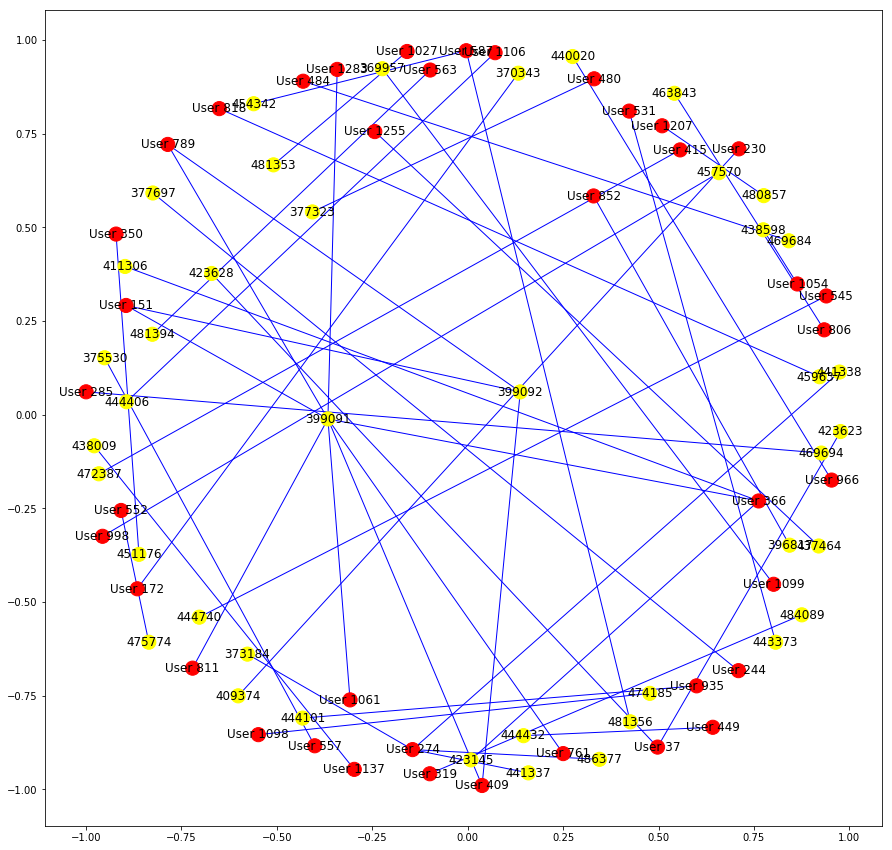

In [336]:
#create empty graph
G = nx.Graph()

#add nodes with the node attribute "bipartite"
doc = set(downloads_user[:50]['User_renamed'])
user = set(downloads_user[:50]['Event Label'])

G.add_nodes_from(doc, bipartite=0)
G.add_nodes_from(user, bipartite=1)

#add edges
edges = list()
for row in range(0,50):
    edge = (downloads_user.iloc[row]['User_renamed'], downloads_user.iloc[row]['Event Label'])
    edges.append(edge)

G.add_edges_from(edges)


#select layout
pos = nx.spring_layout(G,k=1.5)

#adjust size of th graph
plt.figure(figsize = (15,15))

#color users in red and materials in yellow
color_map = []
for node in G:
    if node in downloads_user[:50]['User_renamed'].values:
        color_map.append('red')
    else: color_map.append('yellow')      
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = color_map, node_size = 200)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)

#display graph
plt.show()

In order to figure out which materials are related I transform two mode graph to single mode graph.

In [337]:
#group by user
g = downloads_user.groupby('User_renamed')

#finds all combinations of two materials
materials_pairs = []

for user in set(downloads_user['User_renamed']):
    materials_pairs += list(combinations(g.get_group(user)['Event Label'].values, 2))

#find unique materials pairs
pairs_set = set(materials_pairs)

In [338]:
materials_pairs = pd.DataFrame(materials_pairs,columns=['node1','node2'])
materials_pairs.head()

,node1,node2
0,411353,463760
1,411353,399092
2,411353,463860
3,411353,377490
4,411353,377491


In [339]:
#group by pairs
g = materials_pairs.groupby(['node1','node2'])

In [340]:
#finds all combinations of two pairs
materials_pairs = []
material = pd.DataFrame()

for pair in pairs_set:
    count = len(g.get_group(pair))
    pair = list(pair)
    pair.append(count)
    materials_pairs.append(pair) 

In [341]:
materials = pd.DataFrame(materials_pairs, columns=['node1','node2','count'])
materials.head()

,node1,node2,count
0,369952,468865,1
1,442122,446590,3
2,374691,483907,1
3,377560,406567,1
4,370487,440017,1


The graph belows shows all relationships between materials.

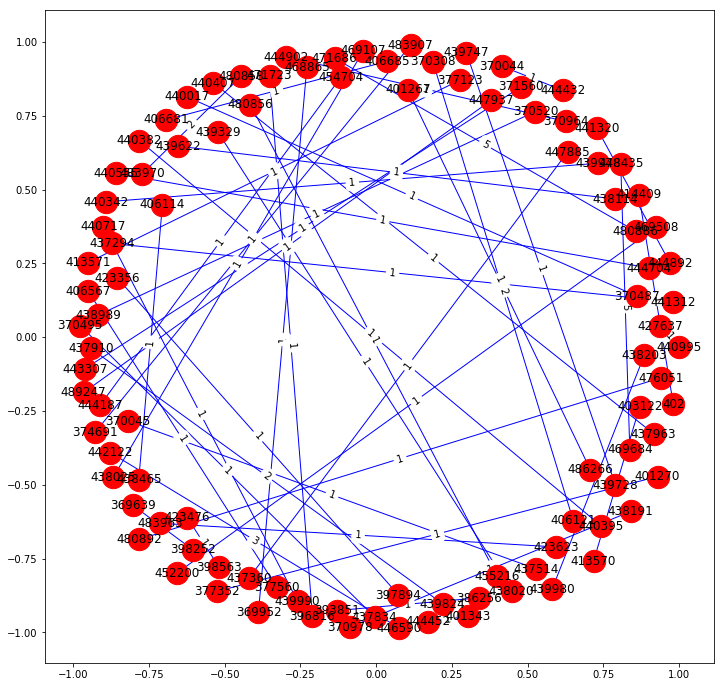

In [342]:
#create empty graph
G = nx.Graph()

#add nodes
edges = materials[['node1','node2','count']][:50].values.tolist()

#adds edges
i=0
for item in edges:
    G.add_edge(item[0],item[1],weight=item[2])

#select layout
pos = nx.spring_layout(G,k=10)

#adjust size of th graph
plt.figure(figsize = (12,12))

#pos=nx.get_node_attributes(G,'pos')      
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), 
                       node_color = 'r', node_size = 500)

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edge_color='b', arrows=True)

nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)

#display graph
plt.show()

In [343]:
#from autocorrect import spell
#spell('got')

For example, material 369549 is related to the following materials.

In [344]:
materials[(materials['node1'] == 369549) | (materials['node2'] == 369549)]

,node1,node2,count
1953,369549,444404,1
8955,369549,438210,1
9985,369549,369634,1
23222,369549,373183,1
24568,469703,369549,1
24934,369549,467714,1
32681,369549,374463,1
34964,369549,369849,1
45574,369549,467779,1
52250,369549,470665,1
